In [3]:
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import webcolors
import pandas as pd

2023-10-29 22:07:37.918975: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:


def preprocess(file_path):
    # Đọc ảnh từ đường dẫn
    byte_img = tf.io.read_file(file_path)

    # Giải mã chuỗi byte thành một tensor ảnh
    img = tf.io.decode_jpeg(byte_img)

    # Đổi kích cỡ thành 100x100 và 3 kênh màu
    img = tf.image.resize(img, (10, 10))
    img = img / 255.0


    return img
    


In [101]:

def get_all_colors(image):
    r=g=b=0
    
    # Lấy tất cả các màu có trong ảnh

    # Lấy kích thước ảnh
    height, width, _ = image.shape

    # Chuyển đổi Tensor thành NumPy array
    image_np = np.array(image)

    # Khởi tạo một  để lưu trữ các giá trị màu 
    all_colors = []

    # Duyệt qua từng điểm ảnh và thu thập các giá trị màu 
    for y in range(height):
        for x in range(width):
            pixel_color = tuple(image_np[y, x])
        
            all_colors.append(pixel_color[0]+pixel_color[1]+pixel_color[2])
            r=pixel_color[0]+r
            g=pixel_color[1]+g
            b=pixel_color[2]+b
    all_colors.append(r)
    all_colors.append(g)
    all_colors.append(b)
    
    #trả về 103 thuộc tính 100 thuộc tính đầu là tổng giá trị rgb tại 1 pixel , 3 thuộc tính còn lại tổng từng r,g,b mỗi ảnh
    return all_colors



In [102]:
#test thử 1 ảnh chuyển về dataframe
file_path = "/Users/jmac/Desktop/camAL/te/image_3.jpg"
# Đoạn code sau đây giả định bạn đã có ma trận điểm ảnh
image = preprocess(file_path)  # Thực hiện tiền xử lý ảnh để lấy ma trận điểm ảnh

# Lấy tất cả các pixel màu trong ảnh
all_colors = get_all_colors(image)
X_new=all_colors
x_new= pd.DataFrame(X_new)
x_new_reshaped = x_new.transpose()
print(x_new_reshaped)




       0         1         2         3         4         5         6    \
0  2.54549  2.831765  2.903529  2.883137  2.927843  2.850196  2.426667   

        7         8         9    ...       93        94        95        96   \
0  2.092941  1.799608  1.801176  ...  2.940392  2.955686  2.977647  2.758823   

        97        98        99         100        101        102  
0  2.440392  2.157255  2.335294  97.098039  83.816078  85.534902  

[1 rows x 103 columns]


In [18]:
#đường dẫn thư mục ảnh 
import os
import numpy
img_list=os.listdir("/Users/jmac/Desktop/camAL/Main/Image")
sorted_img_list = sorted(img_list)  # Sắp xếp danh sách các tệp tin

print(sorted_img_list)
print(len(sorted_img_list))



['img0.jpg', 'img1.jpg', 'img100.jpg', 'img101.jpg', 'img102.jpg', 'img103.jpg', 'img104.jpg', 'img105.jpg', 'img106.jpg', 'img107.jpg', 'img108.jpg', 'img109.jpg', 'img11.jpg', 'img110.jpg', 'img111.jpg', 'img112.jpg', 'img113.jpg', 'img114.jpg', 'img115.jpg', 'img116.jpg', 'img117.jpg', 'img118.jpg', 'img119.jpg', 'img12.jpg', 'img120.jpg', 'img121.jpg', 'img122.jpg', 'img123.jpg', 'img124.jpg', 'img125.jpg', 'img126.jpg', 'img127.jpg', 'img128.jpg', 'img129.jpg', 'img13.jpg', 'img130.jpg', 'img131.jpg', 'img132.jpg', 'img133.jpg', 'img134.jpg', 'img135.jpg', 'img136.jpg', 'img137.jpg', 'img138.jpg', 'img139.jpg', 'img14.jpg', 'img140.jpg', 'img141.jpg', 'img142.jpg', 'img143.jpg', 'img144.jpg', 'img145.jpg', 'img146.jpg', 'img147.jpg', 'img148.jpg', 'img149.jpg', 'img15.jpg', 'img150.jpg', 'img151.jpg', 'img152.jpg', 'img153.jpg', 'img154.jpg', 'img155.jpg', 'img156.jpg', 'img157.jpg', 'img158.jpg', 'img159.jpg', 'img16.jpg', 'img160.jpg', 'img161.jpg', 'img162.jpg', 'img163.jpg', '

In [19]:
import pandas as pd



In [41]:
#lấy nhãn
label = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
print(len(label))
Y=label



299


In [30]:

#th tiền xử lý tất cả ảnh trong thư mục
import os
import numpy
it=os.listdir("/Users/jmac/Desktop/camAL/Main/Image/")
s = sorted(it)  # Sắp xếp danh sách các tệp tin

dt = []
nt=[]
for img in s:
    if(img!='.DS_Store'):
        image = preprocess("/Users/jmac/Desktop/camAL/Main/Image/"+img)  # Thực hiện tiền xử lý ảnh để lấy ma trận điểm ảnh
        col=get_all_colors(image)
        nt.append(img)
        dt.append(col)
dff = pd.DataFrame(dt)
print(dff)
print(nt)
df=dff
X=dff


          0         1         2         3         4         5         6    \
0    0.585098  0.981961  0.984706  1.342353  1.975686  1.606667  1.547059   
1    0.529020  0.795686  0.903137  1.225490  1.663137  1.384314  1.296471   
2    0.751765  0.861569  0.890196  1.167843  1.638431  1.464706  1.425490   
3    0.763137  0.875686  0.875294  1.102353  1.636078  1.429804  1.466667   
4    0.717647  0.818431  0.841177  1.099216  1.611765  1.417647  1.434510   
..        ...       ...       ...       ...       ...       ...       ...   
294  0.436078  0.692941  0.855294  1.236471  1.936471  1.256078  1.045882   
295  0.459216  0.719216  0.845098  1.240784  1.939216  1.225098  1.075686   
296  0.525490  1.000784  0.900000  1.312549  1.912549  1.590588  1.482353   
297  0.524314  0.989020  0.890980  1.343137  1.917647  1.605490  1.482353   
298  0.516863  0.990980  0.930980  1.345882  1.883137  1.581569  1.494902   

          7         8         9    ...       93        94        95   \
0  

299


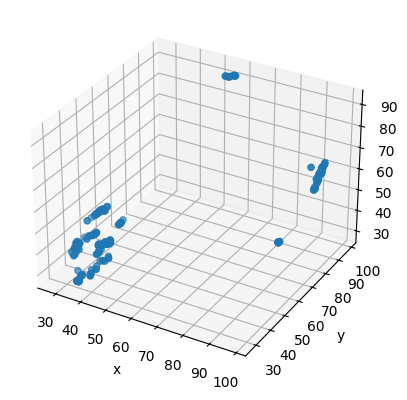

In [36]:
r = df.iloc[:, -3]
g = df.iloc[:, -2]
b = df.iloc[:, -1]
num_data_points = df.shape[0]
print(num_data_points)
# Tạo đối tượng subplot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Vẽ đồ thị ba chiều
ax.scatter(r, g, b)

# Đặt tên trục
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Hiển thị đồ thị mỗi điểm là 1 ảnh với tọa độ tổng r,g,b thương tứng
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
# Split into training and test set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=1)
    

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix

clf = svm.SVC(kernel = 'linear')
clf.fit(X_train,Y_train)
from sklearn.metrics import precision_score, recall_score, f1_score

# Đoán nhãn dựa trên dữ liệu kiểm tra
y_pred = clf.predict(X_test)

# Tính recall, precision và F1-score
recall = recall_score(Y_test, y_pred,average='macro')
precision = precision_score(Y_test, y_pred,average='macro')
f1 = f1_score(Y_test, y_pred,average='macro')

accuracy = clf.score(X_test, Y_test)
accuracy1 = clf.score(X_train, Y_train)
print("Accuracy svm train: {:.2f}".format(accuracy1))
print("Accuracy : {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1-score: {:.2f}".format(f1))



Accuracy svm train: 0.74
Accuracy : 0.65
Recall: 0.54
Precision: 0.76
F1-score: 0.57


In [95]:
clf1=tree.DecisionTreeClassifier(random_state=0)
clf1.fit(X_train,Y_train)
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred1 = clf.predict(X_test)

# Tính recall, precision và F1-score
recall1 = recall_score(Y_test, y_pred1,average='macro')
precision1 = precision_score(Y_test, y_pred1,average='macro')
f11 = f1_score(Y_test, y_pred1,average='macro')

accuracy01 = clf1.score(X_test, Y_test)
accuracy011 = clf1.score(X_train, Y_train)
print("Accuracy decision tree train: {:.2f}".format(accuracy011))
print("Accuracy : {:.2f}".format(accuracy01))
print("Recall: {:.2f}".format(recall1))
print("Precision: {:.2f}".format(precision1))
print("F1-score: {:.2f}".format(f11))


Accuracy decision tree train: 1.00
Accuracy : 0.65
Recall: 0.54
Precision: 0.76
F1-score: 0.57


In [99]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(X_train, Y_train)
y_pred2=model.predict(X_test)
recall2 = recall_score(Y_test, y_pred2,average='macro')
precision2 = precision_score(Y_test, y_pred2,average='macro')
f2 = f1_score(Y_test, y_pred2,average='macro')

accuracy02 = model.score(X_test, Y_test)
accuracy2 = model.score(X_train, Y_train)
print("Accuracy gradient boost train: {:.2f}".format(accuracy2))
print("Accuracy : {:.2f}".format(accuracy02))
print("Recall: {:.2f}".format(recall2))
print("Precision: {:.2f}".format(precision2))
print("F1-score: {:.2f}".format(f2))



Accuracy gradient boost train: 0.85
Accuracy : 0.63
Recall: 0.52
Precision: 0.66
F1-score: 0.54


In [98]:
from sklearn.ensemble import AdaBoostClassifier

model1 = AdaBoostClassifier(random_state=1)
model1.fit(X_train, Y_train)
y_pred3=model1.predict(X_test)
recall3 = recall_score(Y_test, y_pred3,average='macro')
precision3 = precision_score(Y_test, y_pred3,average='macro')
f3 = f1_score(Y_test, y_pred3,average='macro')
accuracy3 = model1.score(X_test, Y_test)
accuracy03 = model1.score(X_train, Y_train)
print("Accuracy adaboost train: {:.2f}".format(accuracy03))
print("Accuracy : {:.2f}".format(accuracy3))
print("Recall: {:.2f}".format(recall3))
print("Precision: {:.2f}".format(precision3))
print("F1-score: {:.2f}".format(f3))




Accuracy adaboost train: 0.73
Accuracy : 0.65
Recall: 0.55
Precision: 0.74
F1-score: 0.57
